In [113]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import ComplementNB

import matplotlib.pyplot as plt

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [114]:
# откройте данные: ваш код здесь
email_data = pd.read_csv('spam_or_not_spam.csv')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [115]:
# рассчитайте частоты для классов : ваш код здесь
email_data['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

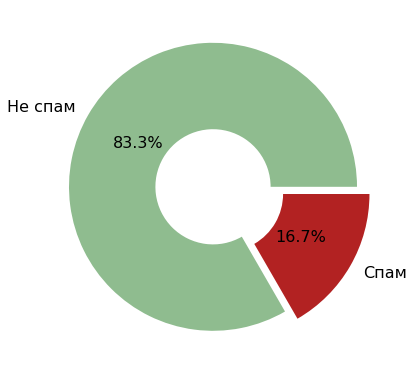

In [116]:
# визуализируйте результат: ваш код здесь
fig1 = plt.figure(figsize=(5, 5))
axes = fig1.add_axes([0, 0, 1, 1])
axes.pie(
    email_data['label'].value_counts(),
    wedgeprops=dict(width=0.6),
    colors=('darkseagreen', 'firebrick'),
    explode = (0, 0.1),
    labels=['Не спам','Спам'],
    textprops={'fontsize': 16},
    autopct='%.1f%%'
);

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [118]:
#ваш код здесь
email_data = email_data.replace(r"^\s*$", np.NaN, regex=True).dropna()

Переводим данные в векторный вид:

In [119]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data['email'])

Определите, сколько теперь признаков в нашем наборе данных:

In [120]:
#ваш код здесь
print(f'В наборе данных получилось {X.shape[1]} признаков.')

В наборе данных получилось 34116 признаков.


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [121]:
#ваш код здесь
y = email_data['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [122]:
#ваш код здесь
#использую алгоритм без стратификации, чтобы ответы совпали с платформой:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# по идеи,  правильный вариант:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [123]:
#ваш код здесь
print(f'Среднее целевой переменной по тестовой выборке: {round(y_test.mean(), 3)}')

Среднее целевой переменной по тестовой выборке: 0.177


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [124]:
#ваш код здесь
compNB = ComplementNB(alpha=0.01)
compNB.fit(X_train, y_train)

ComplementNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [125]:
#ваш код здесь
y_pred = compNB.predict(X_test)

#Рассчитываем accuracy
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
#Рассчитываем precision
print('Precision: {:.3f}'.format(metrics.precision_score(y_test, y_pred)))
#Рассчитываем recall
print('Recall: {:.3f}'.format(metrics.recall_score(y_test, y_pred)))
#Рассчитываем F1-меру
print('F1 score: {:.3f}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 0.991
Precision: 0.977
Recall: 0.970
F1 score: 0.974


Нарисуйте ROC-кривую:

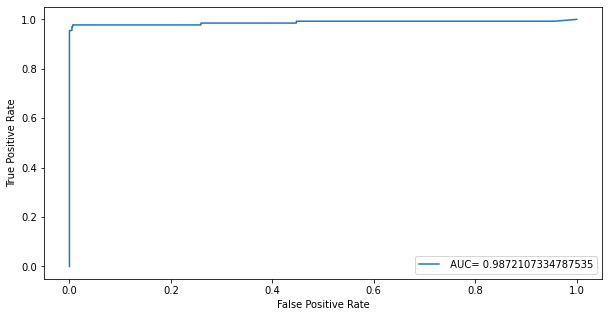

In [126]:
#ваш код здесь
y_pred_proba = compNB.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics. roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

fig2 = plt.figure(figsize=(10, 5))
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [127]:
#ваш код здесь
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_search = GridSearchCV(
    estimator=compNB,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs = -1
)

%time
grid_search.fit(X_train, y_train)
y_test_pred = grid_search.predict(X_test)
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Наилучшие значения гиперпараметров: {'alpha': 0.1}
